In [1]:
import conda_scripts
import pandas as pd
import geopandas as gpd
import datetime
import os

In [2]:
bas = "SRP"

In [3]:
wl = conda_scripts.wiski.wiski.get_gw_stations_wellmeta_in_basin(basins = [f'{bas}*'])

adding prmd
these are the basins ['ADR*' 'PLP*' 'PRM*' 'SRP*' 'UPC*' 'UPE*' 'WRM*']
trying...
https://www2.kisters.net/sonomacountygroundwater/KiWIS/KiWIS?service=kisters&type=queryServices&request=getStationList&datasource=0&format=html&station_name=ADR*&returnfields=station_name,station_no,site_name,station_latitude,station_longitude,ca_sta&ca_sta_returnfields=Vert_coord_Loc,TOS_1,BOS_1,TOS_2,BOS_2,TOS_3,BOS_3,TOS_4,BOS_4,TOS_5,BOS_5,TOS_6,BOS_6,TOS_7,BOS_7,TOS_8,BOS_8,Depth_to_Bot_Perf,Depth_to_Top_Perf,Depth_Category,Subbasin_Name,GWREF_DATUM,Web_Station_Name,Well_Depth
success
trying...
https://www2.kisters.net/sonomacountygroundwater/KiWIS/KiWIS?service=kisters&type=queryServices&request=getStationList&datasource=0&format=html&station_name=PLP*&returnfields=station_name,station_no,site_name,station_latitude,station_longitude,ca_sta&ca_sta_returnfields=Vert_coord_Loc,TOS_1,BOS_1,TOS_2,BOS_2,TOS_3,BOS_3,TOS_4,BOS_4,TOS_5,BOS_5,TOS_6,BOS_6,TOS_7,BOS_7,TOS_8,BOS_8,Depth_to_Bot_Perf,D

In [4]:
wl


,station_name,station_no,site_name,station_latitude,station_longitude,Vert_coord_Loc,TOS_1,BOS_1,TOS_2,BOS_2,...,BOS_7,TOS_8,BOS_8,Depth_to_Bot_Perf,Depth_to_Top_Perf,Depth_Category,Subbasin_Name,GWREF_DATUM,Web_Station_Name,Well_Depth
0,ADR16-0153_1,ADR16-0153_1,PRMD,38.442927,-122.809355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,420.0,120.0,Medium (200-500ft),SANTA ROSA VALLEY - SANTA ROSA PLAIN,95.265757,NaN,420.0
1,ADR16-0153_2,ADR16-0153_2,PRMD,38.443631,-122.809571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SANTA ROSA VALLEY - SANTA ROSA PLAIN,85.080000,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PLP01-0088_1,PLP01-0088_1,PRMD,38.383382,-122.721875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.0,270.0,Medium (200-500ft),SANTA ROSA VALLEY - SANTA ROSA PLAIN,102.490000,NaN,305.0
1,PLP01-0088_2,PLP01-0088_2,PRMD,38.383250,-122.722030,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Other,SANTA ROSA VALLEY - SANTA ROSA PLAIN,102.470000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,WRM24-0004,WRM24-0004,PRMD,38.361564,-122.820188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,498.0,418.0,Medium (200-500ft),WILSON GROVE FORMATION HIGHLANDS,343.099965,NaN,498.0
25,WRM24-0005_1,WRM24-0005_1,PRMD,38.452332,-122.777838,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,259.0,199.0,Medium (200-500ft),SANTA ROSA VALLEY - SANTA ROSA PLAIN,91.871864,NaN,259.0
26,WRM24-0006_1,WRM24-0006_1,PRMD,38.294930,-122.425730,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,140.0,Shallow (0-200ft),NaN,170.826675,NaN,600.0
27,WRM24-0007_1,WRM24-0007_1,PRMD,38.501022,-122.874295,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,105.0,85.0,Shallow (0-200ft),NaN,231.006213,NaN,420.0


In [5]:
stats = wl.dropna(subset='station_no')
stats = stats.dropna(subset='station_longitude')
stats = stats.loc[stats.station_longitude<0]

In [6]:
stats.loc[:, 'station_latitude'] = pd.to_numeric(stats.station_latitude, errors='coerce')
stats.loc[:, 'station_longitude'] = pd.to_numeric(stats.station_longitude, errors='coerce')
stats = stats.astype({'station_latitude': float, 'station_longitude': float}, errors='ignore')

stats = gpd.GeoDataFrame(stats, geometry=gpd.points_from_xy(stats.station_longitude, stats.station_latitude),
                         crs=4326).to_crs(2226)

In [7]:
stats.explore()

In [8]:
wshed = conda_scripts.load_datasets.load_watersheds.load(f'{bas}')

In [9]:
stats = gpd.clip(stats, wshed)

In [10]:
stats

,station_name,station_no,site_name,station_latitude,station_longitude,Vert_coord_Loc,TOS_1,BOS_1,TOS_2,BOS_2,...,TOS_8,BOS_8,Depth_to_Bot_Perf,Depth_to_Top_Perf,Depth_Category,Subbasin_Name,GWREF_DATUM,Web_Station_Name,Well_Depth,geometry
377,SRP0397,382029122355501,Santa Rosa Plain,38.341528,-122.598694,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6389949.680 1886763.579)
541,SRP0569,4901381-005,Santa Rosa Plain,38.343026,-122.611800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,POINT (6386194.478 1887334.236)
542,SRP0570,4901381-001,Santa Rosa Plain,38.343026,-122.611800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,POINT (6386194.478 1887334.236)
14,UPC17-0090_1,UPC17-0090_1,PRMD,38.329924,-122.661987,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,SANTA ROSA VALLEY - SANTA ROSA PLAIN,197.406367,NaN,NaN,POINT (6371765.684 1882663.766)
398,SRP0418,006N007W29P001M,Santa Rosa Plain,38.331200,-122.659800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Shallow (0-200ft),SANTA ROSA VALLEY - SANTA ROSA PLAIN,NaN,NaN,360.0,POINT (6372396.421 1883123.887)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,SRP0585,4901336-001,Santa Rosa Plain,38.579242,-122.835206,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,SANTA ROSA VALLEY - SANTA ROSA PLAIN,NaN,NaN,NaN,POINT (6322910.883 1973866.154)
136,UPE14-0055_1,UPE14-0055_1,PRMD,38.586061,-122.831228,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Other,SANTA ROSA VALLEY - SANTA ROSA PLAIN,0.000000,NaN,NaN,POINT (6324070.658 1976338.784)
132,UPE13-0088_1,UPE13-0088_1,PRMD,38.588889,-122.832500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,220.0,100.0,Shallow (0-200ft),NaN,193.465642,NaN,460.0,POINT (6323716.605 1977372.147)
133,UPE13-0088_2,UPE13-0088_2,PRMD,38.589966,-122.833280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,220.0,100.0,Other,NaN,169.266381,NaN,470.0,POINT (6323497.234 1977766.367)


In [11]:
k = conda_scripts.wiski.wiski.get_kiwis()

In [13]:
# load parameters for basin

locs = [f'{bas}*','ADR*', 'PLP*', 'PRM*',  'UPC*' ,'UPE*' ,'WRM*']

son = [k.get_timeseries_list(station_name=bas, ts_name='01.Fin*,DayMeanEdit*,02.Final*',
                             parametertype_name='Groundwater_elevation',
                             return_fields=['station_name', 'station_no', 'station_id', 'ts_id', 'ts_name',
                                            'parametertype_id', 'parametertype_name', 'coverage']

                             )

       for bas in locs]

In [14]:
pd.concat(son).query("station_name=='PET0173'")

,station_name,station_no,station_id,ts_id,ts_name,parametertype_id,parametertype_name,from,to


In [15]:
assert pd.concat(son).ts_name.nunique()>1

In [16]:
pars = pd.concat(son)
print(f"there are {pars.ts_name.nunique()} parameter types\n\nThey are {pars.ts_name.unique()}")
pars = pars.loc[pd.to_datetime(pars.loc[:,'from']).notnull()]
assert pars.ts_name.nunique()>1, f"there are only {pars.ts_name.nunique()} parameter types\n\nThey are {pars.ts_name.unique()}"

there are 3 parameter types

They are ['02.Final Water Elevation' '01.Final Elevation - Manual Measurement'
 'DayMeanEdit']


In [17]:
parsmissing = pars.loc[~pars.station_no.isin(stats.station_no)]
pars = pars.loc[pars.station_no.isin(stats.station_no)]
assert pars.ts_name.nunique()>1, f"there are only {pars.ts_name.nunique()} parameter types\n\nThey are {pars.ts_name.unique()}"

In [18]:
print(f"from parmissing:\n\nthere are {parsmissing.ts_name.nunique()} parameter types\n\nThey are {parsmissing.ts_name.unique()}\n\n{parsmissing.ts_name.value_counts()}")

print(f"{parsmissing.station_name.apply(lambda x: x[:3]).value_counts()}")
parsmissing.head()

from parmissing:

there are 1 parameter types

They are ['02.Final Water Elevation']

ts_name
02.Final Water Elevation    104
Name: count, dtype: int64
station_name
UPE    56
PLP    31
WRM     9
UPC     7
SRP     1
Name: count, dtype: int64


,station_name,station_no,station_id,ts_id,ts_name,parametertype_id,parametertype_name,from,to
321,SRP0717,Brigadoon,597066,64099010,02.Final Water Elevation,536,Groundwater_elevation,2014-11-13T17:25:36.000Z,2022-07-07T08:03:00.000Z
5,PLP04-0019_1,PLP04-0019_1,41927,65573010,02.Final Water Elevation,536,Groundwater_elevation,2023-01-30T08:00:00.000Z,2024-04-05T08:00:00.000Z
8,PLP04-0051_1,PLP04-0051_1,42081,65576010,02.Final Water Elevation,536,Groundwater_elevation,2010-02-17T08:00:00.000Z,2023-12-05T08:00:00.000Z
14,PLP05-0005_1,PLP05-0005_1,41932,65582010,02.Final Water Elevation,536,Groundwater_elevation,2019-03-01T08:00:00.000Z,2023-11-14T08:00:00.000Z
22,PLP05-0089_1,PLP05-0089_1,42083,65590010,02.Final Water Elevation,536,Groundwater_elevation,2023-02-08T08:00:00.000Z,2023-12-11T08:00:00.000Z


In [19]:
df = []
for name, group in pars.groupby('ts_id'):
    ts = k.get_timeseries_values(ts_id=name,
                                 **{'from': datetime.datetime(1969, 12, 1)},
                                 return_fields=['Value', 'Timestamp', 'Quality Code'])
    if ts.shape[0] > 0:
        ts.loc[:, 'ts_id'] = name

        df.extend([ts])

tsall = pd.concat(df)

C:\Users\arich\AppData\Local\Temp\1\ipykernel_16712\3303262391.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tsall = pd.concat(df)


In [20]:
tsall.index = conda_scripts.wiski.wiski.tz_fix(tsall)

In [42]:
tsall.shape

(559745, 3)

In [43]:
tsall_res = tsall.groupby(['ts_id', "Quality Code",  pd.Grouper(level =0, freq = "1D"), ]).mean().reset_index()

In [44]:
tsall_res.groupby('ts_id').count().sort_values('Value', ascending = False)

,Quality Code,Timestamp,Value
ts_id,,,
59228010,5010,5010,5009
64979010,5994,5994,4945
64980010,6003,6003,4852
30902010,4552,4552,4552
64606010,6003,6003,4550
...,...,...,...
48915010,1,1,1
65697010,1,1,1
48909010,1,1,1


In [47]:
tsall_res.to_csv(os.path.join('..','waterlevel',f'{bas}_wl.csv'))
pars.to_csv(os.path.join('..','waterlevel',f'{bas}_pars.csv'))
stats.to_csv(os.path.join('..','waterlevel',f'{bas}_stats.csv'))

In [ ]:
os.getcwd()

In [25]:
tsall.groupby('ts_id').count().sort_values('Value', ascending = False)

,Value,Quality Code
ts_id,,
59228010,214802,214803
31126010,67001,67001
30902010,39469,39469
30910010,22963,22963
64411010,12408,12408
...,...,...
48915010,1,1
65697010,1,1
48909010,1,1


<Axes: xlabel='Timestamp', ylabel='Value'>

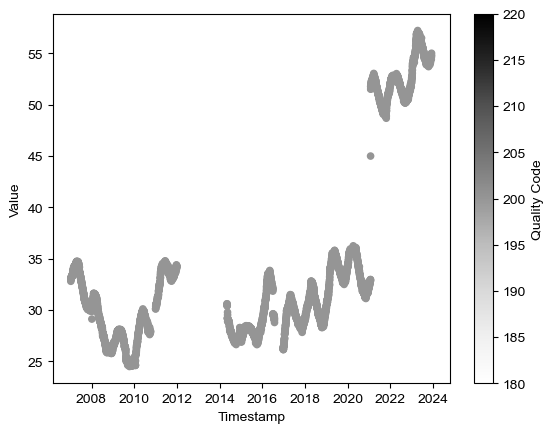

In [46]:
tsall_res.query("ts_id=='59228010'").plot.scatter(x = 'Timestamp', y = 'Value', c = "Quality Code")

In [27]:
tsall.query("ts_id=='59228010'")

,Value,Quality Code,ts_id
Timestamp,,,
2007-01-01 00:00:00,NaN,-1,59228010
2007-01-11 00:00:00,32.80,200,59228010
2007-01-12 00:00:00,32.91,200,59228010
2007-01-13 00:00:00,32.98,200,59228010
2007-01-14 00:00:00,33.03,200,59228010
...,...,...,...
2023-12-06 15:00:00,55.06,200,59228010
2023-12-06 15:15:00,55.06,200,59228010
2023-12-06 15:30:00,55.05,200,59228010


In [30]:
pars.query("ts_id=='59228010'")

,station_name,station_no,station_id,ts_id,ts_name,parametertype_id,parametertype_name,from,to
296,SRP0725,Sebastopol_City_Well_5,373387,59228010,02.Final Water Elevation,536,Groundwater_elevation,2007-01-01T08:00:00.000Z,2023-12-07T00:00:00.000Z
